In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import os

In [9]:
#Data = pd.read_csv('all_parameters.csv', sep=';')
path_csv = './all precipitation from meteoRu/csv/'

In [10]:
import scipy.stats as ss
import scipy.optimize as so
def likelihood_f(P, x, neg=-1):
    n=np.round(P[0]) #by definition, it should be an integer 
    p=P[1]
    loc = 0
    return neg*(np.log(ss.nbinom.pmf(x, n, p, loc))).sum()

In [11]:
res = pd.read_csv('all_parameters_new.csv', sep = ';')
res.shape

(599, 13)

In [12]:
res = pd.read_csv('all_parameters_new.csv', sep = ';')
l = len(res['R'])

r_precipitation_old = [float(str(i).replace(',', '.')) for i in res['R']]
p_precipitation_old = [float(str(i).replace(',', '.')) for i in res['P']]
r_dry_old = [float(str(i).replace(',', '.')) for i in res['R.1']]
p_dry_old = [float(str(i).replace(',', '.')) for i in res['P.1']]

In [13]:
len(res['R'])

599

In [28]:
import tqdm
from IPython.display import clear_output

In [51]:
filename = '20087.csv'
filename.split('.')[0]

'20087'

In [52]:
%%time
#ind = 3
r_precipitation_new = []
p_precipitation_new = []
delta_precipitation = []
r_dry_new = []
p_dry_new = []
delta_dry = []
name = []
for ind1, filename in tqdm.tqdm(enumerate(os.listdir(path_csv))):
#     if ind % 50 == 0:
#         print(ind)
    #filename = '20087.csv'
    name.append(filename.split('.')[0])
    data = pd.read_csv(path_csv + filename, sep = ';', header = None)
    precipitation = data[11]
    if (ind1 < 599):
        ind = ind1
    else: ind = 598
    #precipitation
    length_of_precipitation = [];
    l = 0.;
    for i  in range(1, len(precipitation)):
        if precipitation[i] <= 0.0:
            if l > 0:
                length_of_precipitation.append(l - 1)
            l = 0;
        else:
            l += 1;

    X = length_of_precipitation;
    r = r_precipitation_old[ind]
    p = p_precipitation_old[ind]
    old_res = likelihood_f([r, p], X)
    new_res = so.minimize(likelihood_f, [r,p],args = (X, -1), method='Nelder-Mead', options={'xtol': 1e-9}).fun
    r, p = so.minimize(likelihood_f, [r,p],args = (X, -1), method='Nelder-Mead', options={'xtol': 1e-9}).x
    delta_precipitation.append(old_res - new_res)
    r_precipitation_new.append(r)
    p_precipitation_new.append(p)

    #dry_periods
    length_of_precipitation = [];
    l = 0.;
    for i  in range(1, len(precipitation)):
        if precipitation[i] > 0.0:
            if l > 0:
                length_of_precipitation.append(l - 1)
            l = 0;
        else:
            l += 1;

    X = length_of_precipitation;
    r = r_dry_old[ind]
    p = p_dry_old[ind]
    old_res = likelihood_f([r, p], X)
    new_res = so.minimize(likelihood_f, [r,p],args = (X, -1), method='Nelder-Mead', options={'xtol': 1e-9}).fun
    r, p = so.minimize(likelihood_f, [r,p],args = (X, -1), method='Nelder-Mead', options={'xtol': 1e-9}).x
    delta_dry.append(old_res - new_res)
    r_dry_new.append(r)
    p_dry_new.append(p)
    clear_output(True)





600it [23:36,  1.76s/it]

CPU times: user 22min 10s, sys: 38.2 s, total: 22min 48s
Wall time: 23min 36s


In [22]:
print delta_precipitation, delta_dry

[19.522908154937795, 114.44183403094758, 87.929034188133301, 21.810967299919866, 55.129556439188491, 147.52780145844008, 5.9329261510820288, 138.48789900631164, 116.7196486666453, 52.097560940863332] [208.20992690237381, 465.06454040567405, 383.97204098797556, 287.51772883395097, 376.15876705792562, 395.0226337642107, 219.14897119585839, 496.28549176360684, 486.91158560496115, 405.64993301514005]


In [53]:
data = pd.DataFrame({"station_number": name, "R_precipitation": r_precipitation_new, "P_precipitation":p_precipitation_new,
                     "R_dry": r_dry_new, "P_dry":p_dry_new})
#data = data.transpose()

In [54]:
data.to_csv("new_parameters_dist.csv", sep = ';')

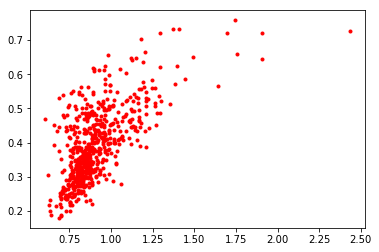

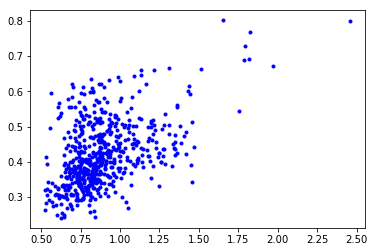

In [55]:
plt.plot(r_precipitation_old, p_precipitation_old, 'r.')
plt.show()
plt.plot(r_precipitation_new, p_precipitation_new, 'b.')
plt.show()

[0.629831406, 0.542552892, 0.591880559, 0.633720554]